In [1]:
import os
import numpy as np
import shutil
import keras
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.models import load_model
from keras.layers import GlobalAveragePooling2D
from keras.utils import multi_gpu_model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

Using TensorFlow backend.


Steps Involved in preprocessing::

list was made containing all the images and to know the number of images:

In [172]:
ke = []
for name in os.listdir("C:/Users/Ritwik/Downloads/Test/Normal"):
    ke.append(name)
print(len(ke))

200


For Selecting a particular number of images :

In [ ]:
'''train = np.random.choice(ke, 250, replace = False)
ke = list(set(ke) - set(train))
print(len(ke)) '''

For moving images from one folder to another

In [ ]:
'''for n in ke:
    shutil.move("/content/drive/My Drive/Mnist/Test/Normal/" + n, "/content/drive/My Drive/test60/Normal")
    '''

 Another list was made containing the Images in the form of Numpy array by following method.



In [173]:
folder='C:/Users/Ritwik/Downloads/Mnist/Test/Normal/'
kl=[]
for i in ke:    
    norm_pic_address = folder+i
    norm_load = Image.open(norm_pic_address)
    kl.append(np.array(norm_load))
imgArray = np.asarray(kl, dtype=np.float32) 

Adding noise to the Numpy array and Then the Images containing Noise were saved into folders containing specific noise  by following Method the folders were also created automatically.

In [174]:

j=[]
for nf in range(10,50,10):
    '''Gaussian noise'''
    gnImgArray = imgArray + nf * np.random.normal(loc=0.0, scale=1.0, size=imgArray.shape)
    j.append(gnImgArray)
for nf in range(10,50,10):    
    '''poisson noise'''
    pnImgArray = imgArray + nf * np.random.poisson(lam=1.0, size=imgArray.shape)
    j.append(pnImgArray)
for nf in range(10,50,10):    
    '''Speckel noise'''
    gn2ImgArray = imgArray + nf * np.random.normal(loc=0.0, scale=1.0, size=imgArray.shape)
    spImgArray = imgArray + imgArray * gn2ImgArray
    j.append(spImgArray)
j = np.asarray(j, dtype=np.float32)
parent='C:/Users/Ritwik/Downloads/Test/'
for nf in range(10,50,10):
    num=(nf//10)-1
    '''Gaussian Dir'''
    di=str(nf)+'Gaussian'
    pathcr=os.path.join(parent,di)
    os.mkdir(pathcr)
    for i in range(0,200):
        im = Image.fromarray(j[num][i])
        im = im.convert("L")
        path=pathcr+'/'
        im.save(path+ke[i])
            
    '''Poisson Dir'''
    di=str(nf)+'Poission'
    num=(nf//10)+3
    pathcr=os.path.join(parent,di)
    os.mkdir(pathcr)
    for i in range(0,200):
        im = Image.fromarray(j[num][i])
        im = im.convert("L")
        path=pathcr+'/'
        im.save(path+ke[i])
            
    '''Speckel Dir'''
    di=str(nf)+'Speckel'
    num=(nf//10)+7
    pathcr=os.path.join(parent,di)
    os.mkdir(pathcr)
    for i in range(0,200):
        im = Image.fromarray(j[num][i])
        im = im.convert("L")
        path=pathcr+'/'
        im.save(path+ke[i])    

In [ ]:
''''e = []
for name in os.listdir("C:/Users/Ritwik/Downloads/Test/20S"):
    e.append(name)
print(len(e))'''

In [17]:
'''folder='C:/Users/Ritwik/Downloads/Mnist/Test/20S/'    
norm_pic_address = folder+e[6]
norm_load = Image.open(norm_pic_address)
nparray=np.array(norm_load)
a = np.asarray(nparray, dtype=np.float32)'''

Below code represent code for plotting images

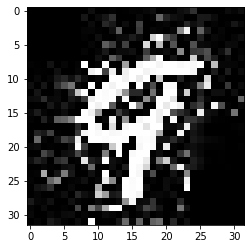

In [18]:
'''plt.imshow(a,cmap = "gray")
plt.show()'''

Steps Involved in training:

1)paths of training,testing and validation set were identified.

2)Size of image specified as per the input requirement of Model

3)Then Some Data Augmentation was done for making the value of pixel between 0 and 1 so that the training procedure can be fast.

4)Batch Size and Epoch were specified

5)Train ,test and validation were generated by the following code:
flow_from_directory::Takes the path to a directory, and generates batches of augmented/normalized data. 

In [181]:
train_folder= "C:/Users/Ritwik/Downloads/Mnist/Train"
val_folder = "C:/Users/Ritwik/Downloads/Mnist/Val"
test_folder = "C:/Users/Ritwik/Downloads/Test/Test10"
image_size = 32
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)
EPOCHS = 10
BATCH_SIZE = 10
train_generator = train_datagen.flow_from_directory(train_folder,
                                                  target_size = (image_size, image_size),
                                                   color_mode='grayscale',
                                                  batch_size = BATCH_SIZE,
                                                  class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val_folder,
     target_size=(image_size, image_size),
      color_mode='grayscale',
     batch_size=BATCH_SIZE,
     class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_folder,
                                            target_size = (image_size, image_size),
                                            color_mode='grayscale',
                                             batch_size = 1,
                                            class_mode = 'categorical',
                                            )

Found 2000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


Then the model was trained on the train generator and validated using a validation generator.
 
1.Model Defination

In [176]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=4, activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_15 (Averag (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_23 (Dense)             (None, 84)               

Model Compilation:It defines the loss function, the optimizer and the metrics

In [177]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Training/Fitting od Model

In [178]:
 model.fit_generator(train_generator,
                            epochs = 10,
                            steps_per_epoch=train_generator.samples/train_generator.batch_size,
                            validation_steps=validation_generator.samples/validation_generator.batch_size,
                            validation_data = validation_generator,

                            verbose=1)

Epoch 1/10
200/200 [==============================] - 5s 27ms/step - loss: 0.5021 - accuracy: 0.7875 - val_loss: 0.5817 - val_accuracy: 0.9670
Epoch 2/10
200/200 [==============================] - 3s 17ms/step - loss: 0.0778 - accuracy: 0.9745 - val_loss: 0.0047 - val_accuracy: 0.9710
Epoch 3/10
200/200 [==============================] - 3s 17ms/step - loss: 0.0381 - accuracy: 0.9890 - val_loss: 0.0075 - val_accuracy: 0.9980
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.0132 - accuracy: 0.9970 - val_loss: 8.3009e-04 - val_accuracy: 1.0000
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 0.0011 - val_accuracy: 0.9990
Epoch 6/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 5.8833e-04 - val_accuracy: 1.0000
Epoch 7/10
200/200 [==============================] - 3s 17ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0078 - val_accuracy

Evaluating Testing accuray on test data(containing 50% noise)

In [179]:
test_accu_initial = model.evaluate_generator(test_generator, steps = test_generator.samples/test_generator.batch_size, verbose=1)

900/900 [==============================] - 2s 2ms/step


In [40]:
print('The testing accuracy for 50%(trained on 50%):',test_accu_initial[1]*100, '%')
print('The testing accuracy for 10%(trained on 50%) :',test_accu_10[1]*100, '%')
print('The testing accuracy for 20%(trained on 50%):',test_accu_20[1]*100, '%')
print('The testing accuracy for 30%(trained on 50%) :',test_accu_30[1]*100, '%')
print('The testing accuracy for 40%(trained on 50%):',test_accu_40[1]*100, '%')
print('The testing accuracy for 60%(trained on 50%):',test_accu_60[1]*100, '%')

The testing accuracy for 50%(trained on 50%): 100.0 %
The testing accuracy for 10%(trained on 50%) : 48.625001311302185 %
The testing accuracy for 20%(trained on 50%): 57.749998569488525 %
The testing accuracy for 30%(trained on 50%) : 82.12500214576721 %
The testing accuracy for 40%(trained on 50%): 99.87499713897705 %
The testing accuracy for 60%(trained on 50%): 100.0 %


In [183]:
print('The testing accuracy for 50%(trained on 50%):',test_accu_10[1]*100, '%')

The testing accuracy for 50%(trained on 50%): 47.999998927116394 %


Evaluating Testing accuray on test data(containing 10% noise)

In [182]:
test_accu_10 = model.evaluate_generator(test_generator, steps = test_generator.samples/test_generator.batch_size, verbose=1)


800/800 [==============================] - 1s 2ms/step


Evaluating Testing accuray on test data(containing 20% noise)

In [28]:
test_accu_20 = model.evaluate_generator(test_generator, steps = test_generator.samples/test_generator.batch_size, verbose=1)

800/800 [==============================] - 11s 14ms/step


Evaluating Testing accuray on test data(containing 30% noise)

In [31]:
test_accu_30 = model.evaluate_generator(test_generator, steps = test_generator.samples/test_generator.batch_size, verbose=1)

800/800 [==============================] - 12s 15ms/step


Evaluating Testing accuray on test data(containing 40% noise)

In [34]:
test_accu_40 = model.evaluate_generator(test_generator, steps = test_generator.samples/test_generator.batch_size, verbose=1)

800/800 [==============================] - 14s 18ms/step


Evaluating Testing accuray on test data(containing 60% noise)

In [10]:
test_accu_60 = model.evaluate_generator(test_generator, steps = test_generator.samples/test_generator.batch_size, verbose=1)

800/800 [==============================] - 5s 7ms/step


The below four blocks of code represent the code used for predicting the probability of one image belonging to certain class

In [184]:
kpke = []
for name in os.listdir("C:/Users/Ritwik/Downloads/Test/Test40/Poission"):
    kpke.append(name)
print(len(kpke))

200


In [185]:
from PIL import Image
import numpy as np
from skimage import transform
folder='C:/Users/Ritwik/Downloads/Test/Test40/Poission/'   
filename = folder+kpke[1]
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (32,32,1))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(filename)
most_likely_labels=model.predict(image)

Below code represent the probalitiy of a single image belonging to a certain class

In [186]:
print(most_likely_labels)

[[5.0215540e-04 2.1532286e-10 9.9944896e-01 4.8886737e-05]]


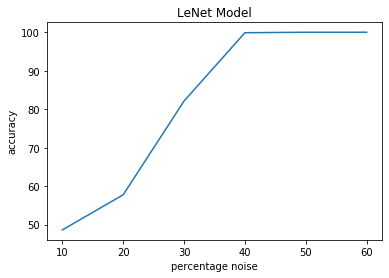

In [187]:
import matplotlib.pyplot as plt 
x = [10,20,30,40,50,60] 
# corresponding y axis values 
y = [48.625001311302185,57.749998569488525,82.12500214576721,99.87499713897705,100.0,100.0] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('percentage noise') 
# naming the y axis 
plt.ylabel('accuracy') 
  
# giving a title to my graph 
plt.title('LeNet Model') 
  
# function to show the plot 
plt.show() 
